# Ishika Shah
# Data Science and Business Analytics Intern
# GRIP Foundation

From the given ‘Iris’ dataset, predict the optimum number of clusters
and represent it visually.

Importing necessary libraries

In [43]:
import random
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd
import itertools
from sklearn import datasets
import seaborn as sns

Loading iris dataset

In [44]:
data = datasets.load_iris()
data_df = pd.DataFrame(data.data, columns = data.feature_names)
data_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Visualizing Iris dataset

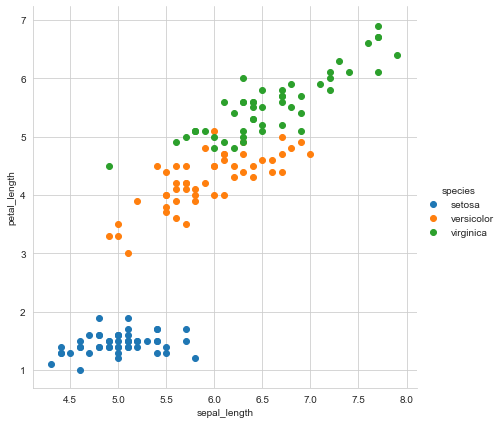

In [27]:
iris = sns.load_dataset('iris')
sns.set_style("whitegrid")
sns.FacetGrid(iris, hue ="species",
              height = 6).map(plt.scatter,
                              'sepal_length',
                              'petal_length').add_legend()

Using Elbow method to find the optimum number of clusters. The elbow method states that the k for which there is a steep slope is the optimum k

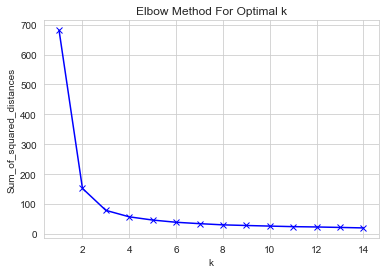

In [17]:
x = data_df.iloc[:, [0, 1, 2, 3]].values
Sum_of_squared_distances = []

for k in range(1, 15):
    km = KMeans(n_clusters=k)
    km = km.fit(x)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(range(1, 15), Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

We found that 3 is the optimum number of clusters

In [28]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

Plotting scatter plot with clusters with cluster centers as well

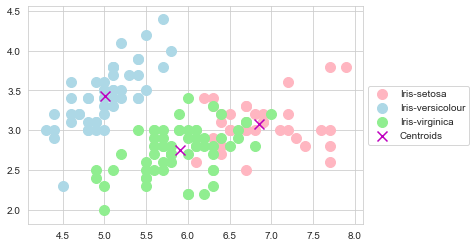

In [40]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'lightpink', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'lightblue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'lightgreen', label = 'Iris-virginica')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'm', label = 'Centroids', marker='x')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))